# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 35

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, verbose=0)


experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'l0_sparseness', 'alpha_homeo', 'alpha_MP', ]


list_figures = []
list_figures = ['show_dico']

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HAP.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     1670 Sep 21 15:49 cache_dir/HAP.py
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:15 cache_dir/HAP_alpha_MP=0.07139_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:15 cache_dir/HAP_alpha_MP=0.10466_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:15 cache_dir/HAP_alpha_MP=0.15342_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=0.22491_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=0.32970_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=0.48332_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=0.70851_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=1.03863_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 21 13:16 cache_dir/HAP_alpha_MP=1.52256_dico.pkl
-rw-r--r--  1 laurentperrinet  st

In [7]:
# this removes older computations and restarts computations
!rm -fr {experiments.shl.cache_dir}/{tag}*pkl
!ls -l {experiments.shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff  1670 Sep 21 15:49 cache_dir/HAP.py


In [8]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed: 19.0min
[Parallel(n_jobs=35)]: Done   4 out of  45 | elapsed: 19.4min remaining: 199.3min
[Parallel(n_jobs=35)]: Done   8 out of  45 | elapsed: 20.4min remaining: 94.2min
[Parallel(n_jobs=35)]: Done  12 out of  45 | elapsed: 20.5min remaining: 56.3min
[Parallel(n_jobs=35)]: Done  16 out of  45 | elapsed: 20.6min remaining: 37.3min
[Parallel(n_jobs=35)]: Done  20 out of  45 | elapsed: 20.6min remaining: 25.8min
[Parallel(n_jobs=35)]: Done  24 out of  45 | elapsed: 20.6min remaining: 18.0min
[Parallel(n_jobs=35)]: Done  28 out of  45 | elapsed: 20.7min remaining: 12.5min
[Parallel(n_jobs=35)]: Done  32 out of  45 | elapsed: 20.8min remaining:  8.5min
[Parallel(n_jobs=35)]: Done  36 out of  45 | elapsed: 28.3min remaining:  7.1min
[Parallel(n_jobs=35)]: Done  40 out of  45 | elapsed: 28.9min remaining:  3.6min
[Parallel(n_jobs=35)]: Done  45 out of  45 | elaps

Running variable eta with value 0.0001


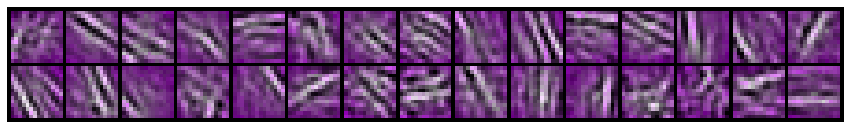

Running variable eta with value 0.0001


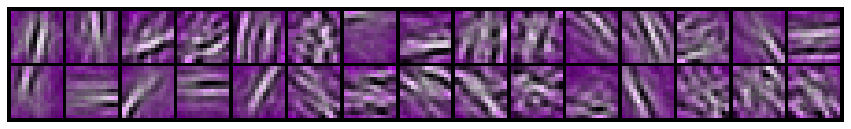

Running variable eta with value 0.0002


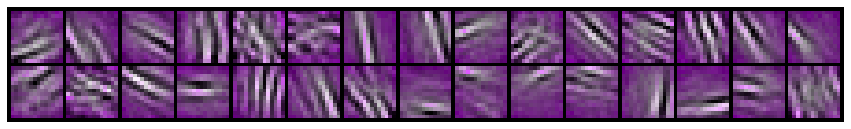

Running variable eta with value 0.0003


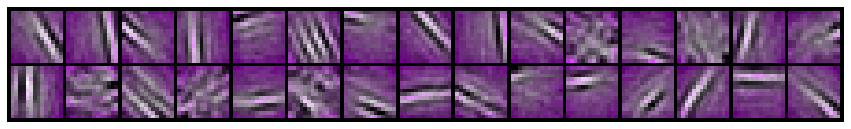

Running variable eta with value 0.0004


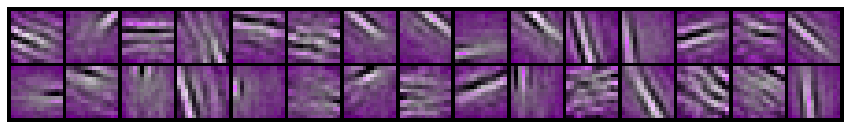

Running variable eta with value 0.0006


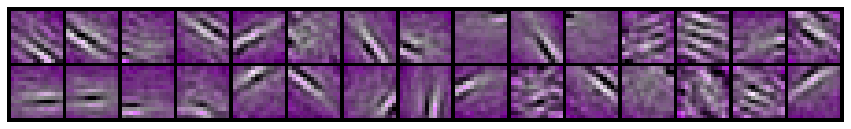

Running variable eta with value 0.0009


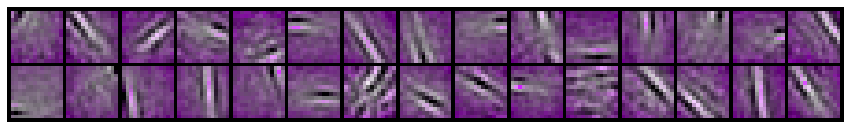

Running variable eta with value 0.0013


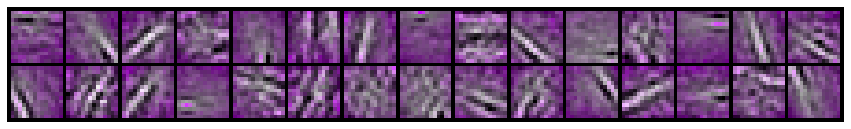

Running variable eta with value 0.0018


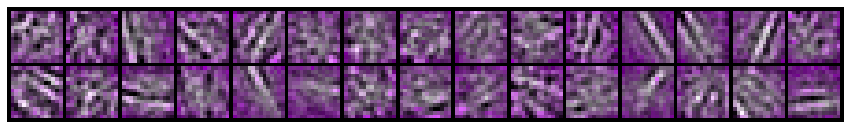

Time evolution of  F


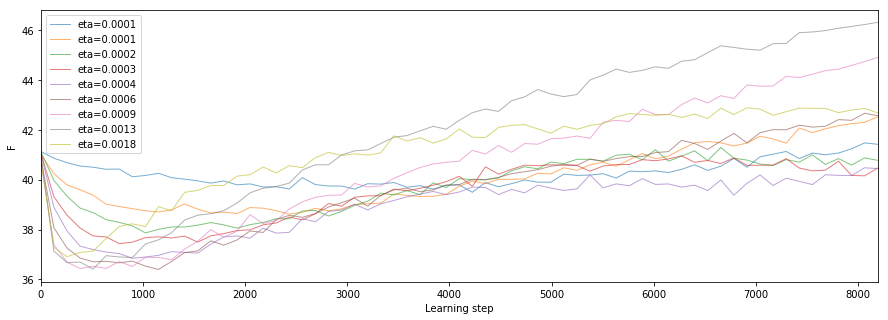

Comparison at the end of learning for  F


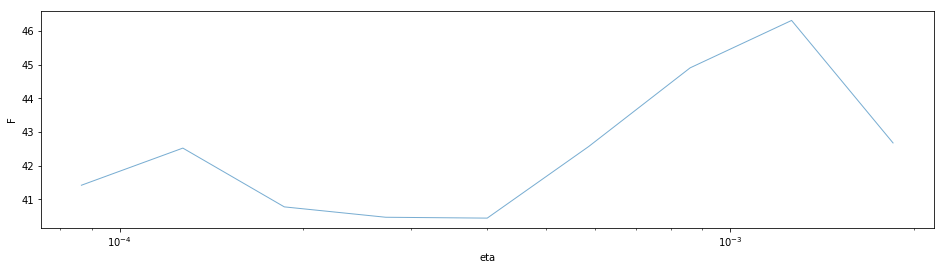

Running variable eta_homeo with value 0.0001


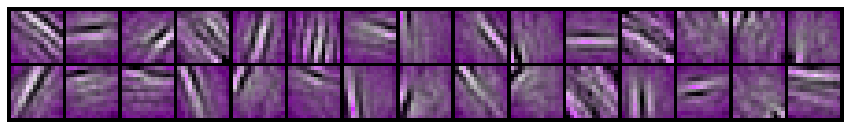

Running variable eta_homeo with value 0.0001


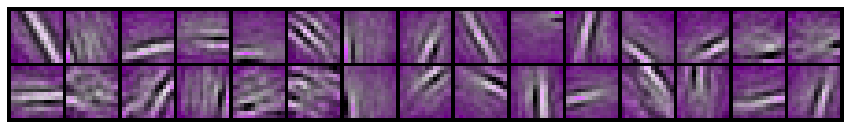

Running variable eta_homeo with value 0.0002


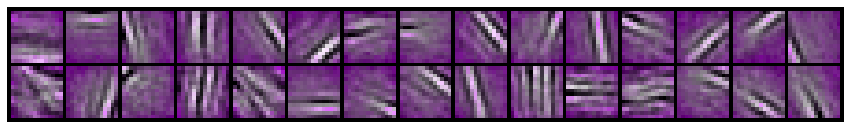

Running variable eta_homeo with value 0.0003


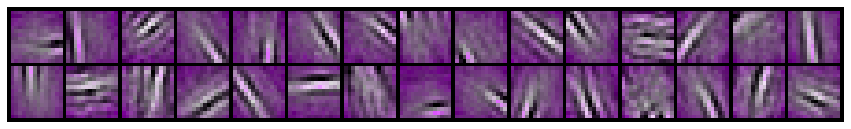

Running variable eta_homeo with value 0.0004


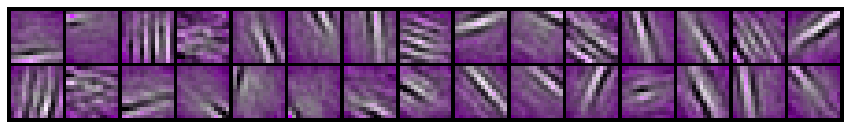

Running variable eta_homeo with value 0.0006


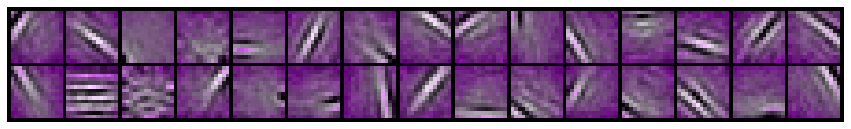

Running variable eta_homeo with value 0.0009


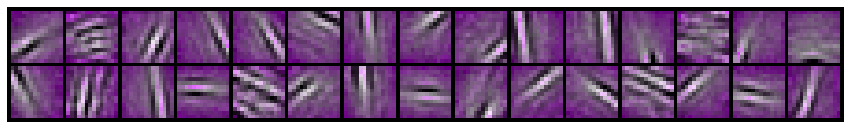

Running variable eta_homeo with value 0.0013


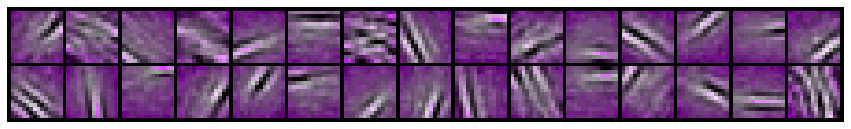

Running variable eta_homeo with value 0.0018


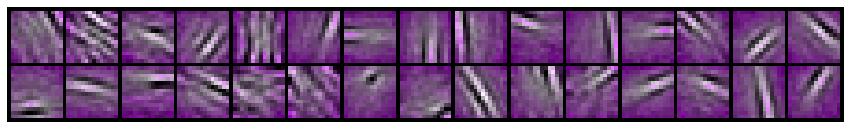

Time evolution of  F


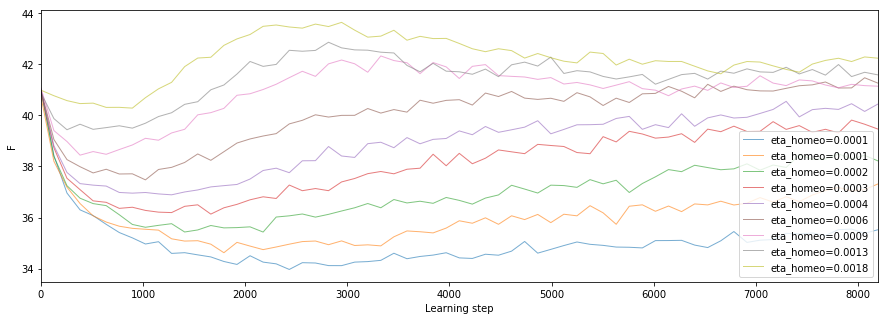

Comparison at the end of learning for  F


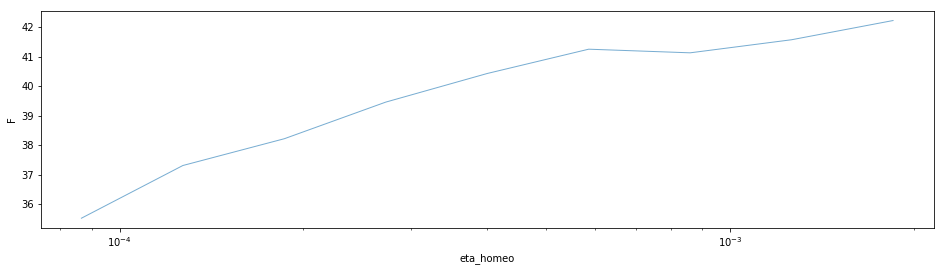

Running variable l0_sparseness with value 3


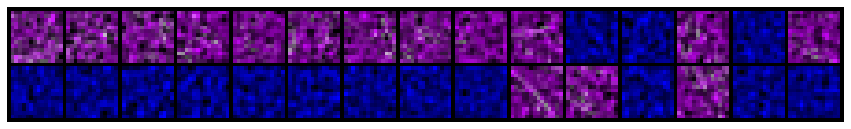

Running variable l0_sparseness with value 4


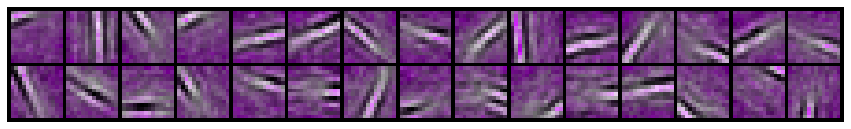

Running variable l0_sparseness with value 6


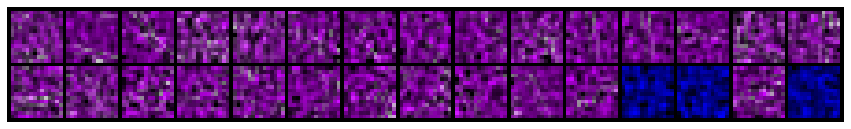

Running variable l0_sparseness with value 9


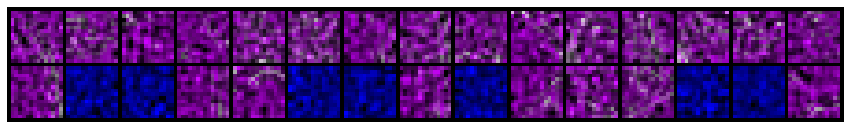

Running variable l0_sparseness with value 14


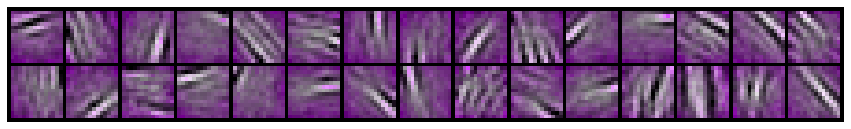

Running variable l0_sparseness with value 20


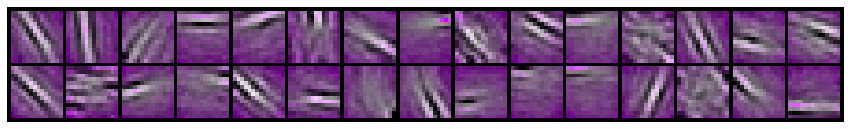

Running variable l0_sparseness with value 30


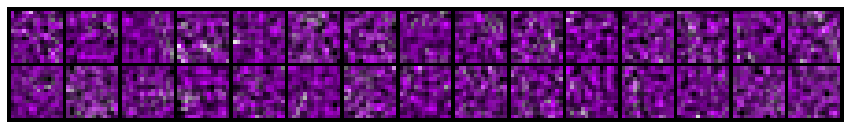

Running variable l0_sparseness with value 44


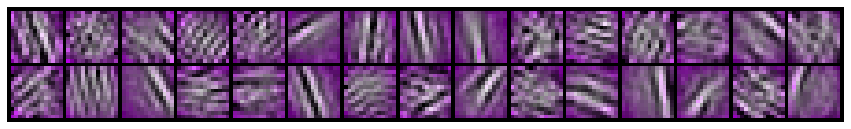

Running variable l0_sparseness with value 64


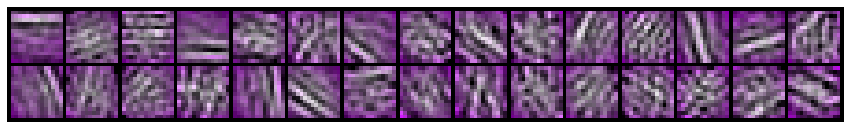

Time evolution of  F


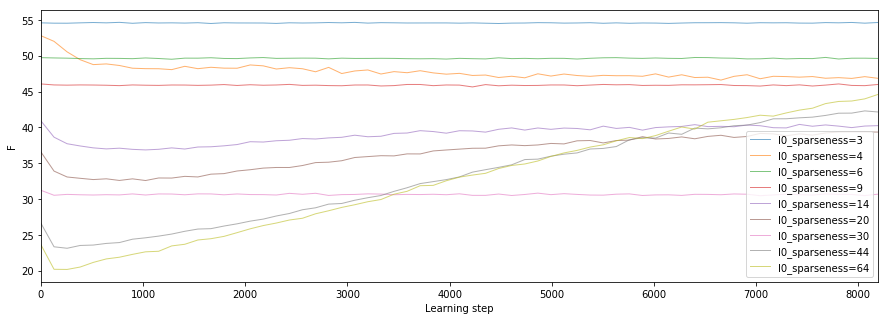

Comparison at the end of learning for  F


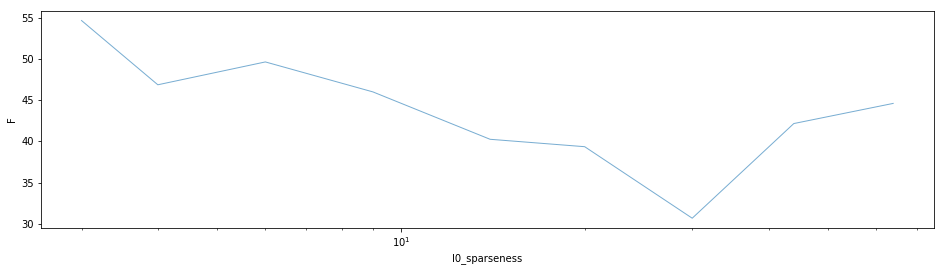

Running variable alpha_homeo with value 0.0011


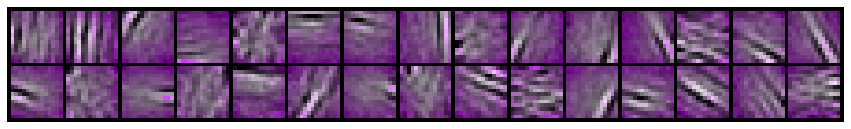

Running variable alpha_homeo with value 0.0016


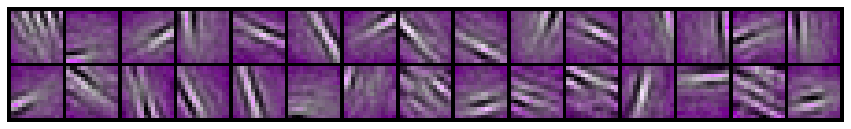

Running variable alpha_homeo with value 0.0023


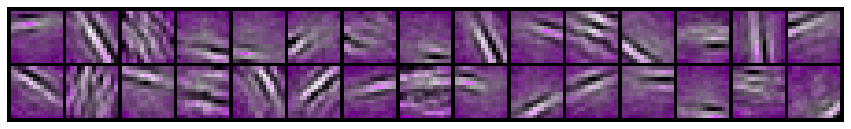

Running variable alpha_homeo with value 0.0034


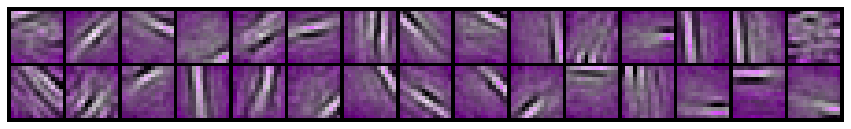

Running variable alpha_homeo with value 0.0050


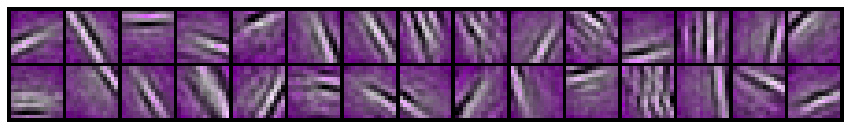

Running variable alpha_homeo with value 0.0073


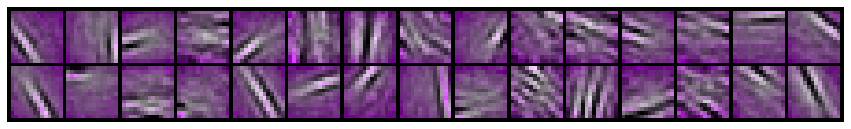

Running variable alpha_homeo with value 0.0107


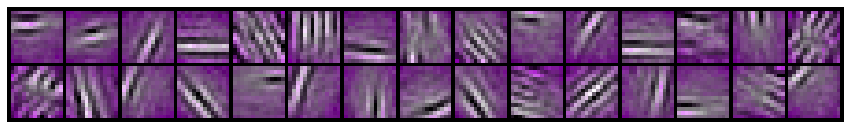

Running variable alpha_homeo with value 0.0158


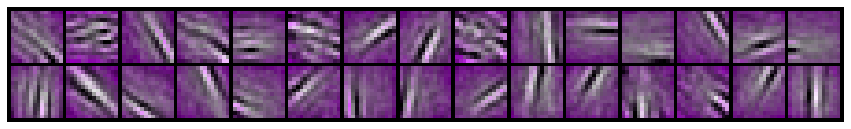

Running variable alpha_homeo with value 0.0231


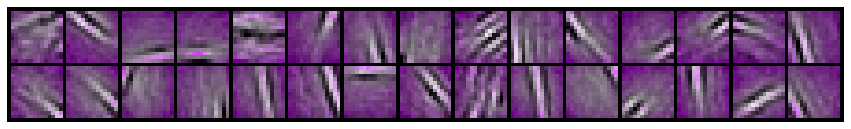

Time evolution of  F


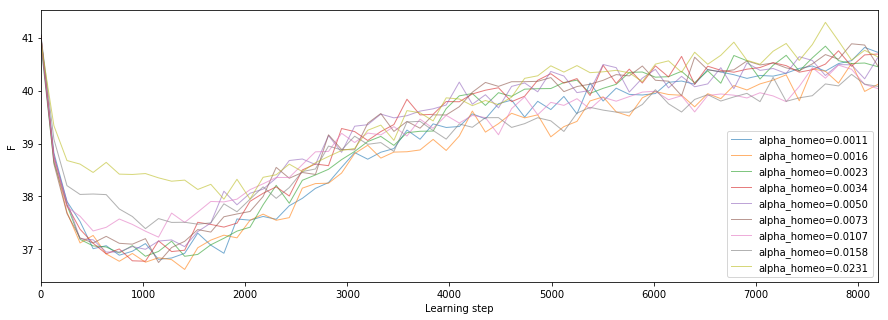

Comparison at the end of learning for  F


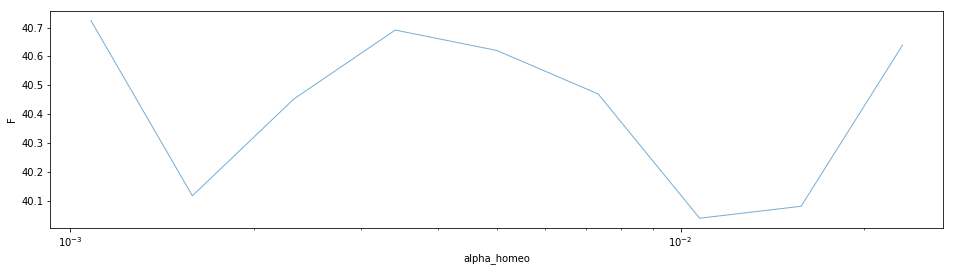

Running variable alpha_MP with value 0.0714


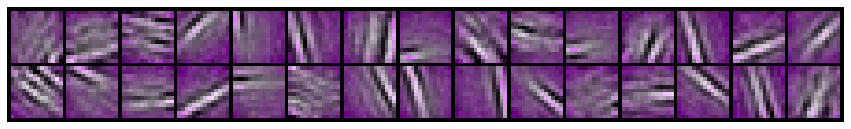

Running variable alpha_MP with value 0.1047


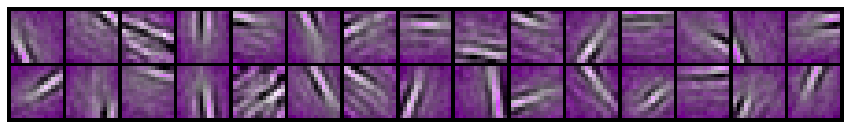

Running variable alpha_MP with value 0.1534


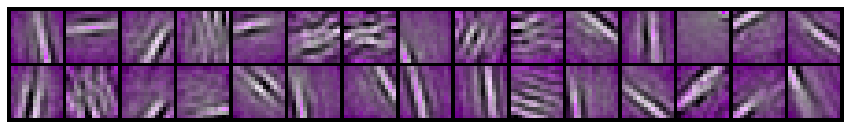

Running variable alpha_MP with value 0.2249


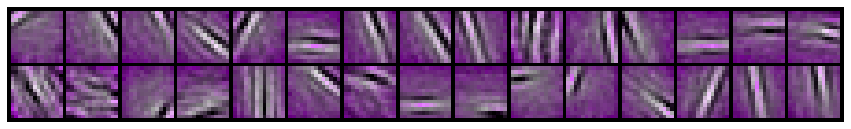

Running variable alpha_MP with value 0.3297


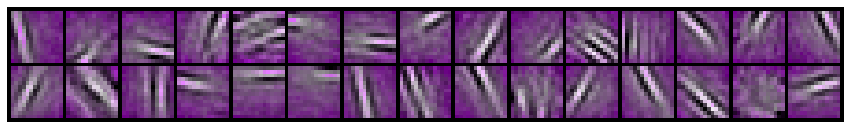

Running variable alpha_MP with value 0.4833


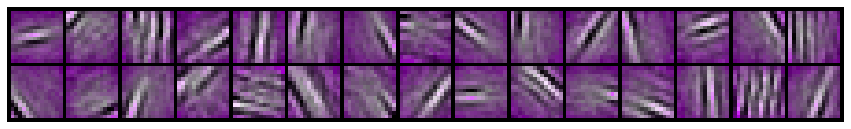

Running variable alpha_MP with value 0.7085


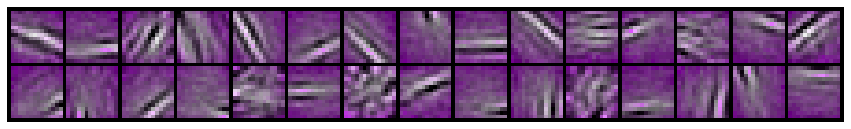

Running variable alpha_MP with value 1.0386


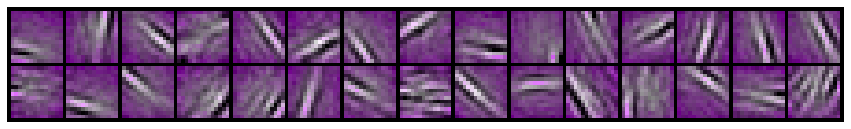

Running variable alpha_MP with value 1.5226


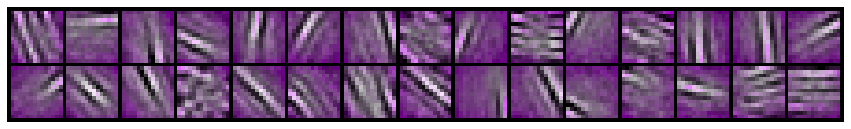

Time evolution of  F


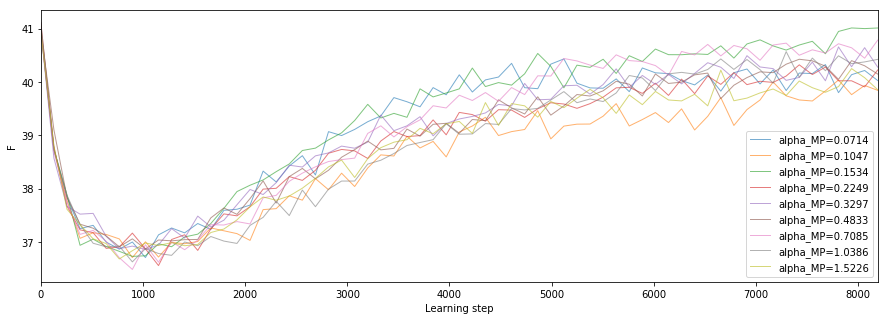

Comparison at the end of learning for  F


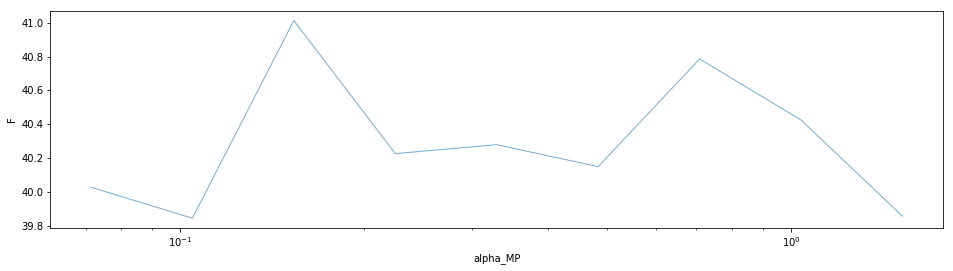

In [12]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [10]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Fri Sep 21 16:19:09 2018 CEST